# Chapter 1: Introduction
---

## Background:

Spam emails have been a persistent nuisance in the digital world, cluttering inboxes and potentially causing harm through phishing scams or malware distribution. To combat this issue, various techniques have been developed, including machine learning algorithms, to automatically classify emails as either spam or legitimate (ham). In this project, we aim to leverage a dataset provided by Apache SpamAssassin, which contains a collection of spam and ham emails, to develop a machine learning model that can effectively distinguish between the two.

---

## Problem Statement:

The proliferation of spam emails continues to be a significant problem, impacting user experience, productivity, and potentially compromising cybersecurity. The challenge lies in developing robust algorithms capable of accurately identifying spam while minimizing false positives (legitimate emails classified as spam) and false negatives (spam emails classified as legitimate). Our objective is to address this problem by building a machine learning model trained on the provided dataset to classify emails as either spam or ham with high precision and recall.

---

## Project Objective:

The main objective of this project is to develop a machine learning model capable of effectively classifying emails as spam or ham. Specifically, we aim to achieve the following objectives:
- Preprocess the dataset to extract relevant features and normalize the text data.
- Explore and analyze the dataset to gain insights into the distribution of spam and ham emails and the characteristics of each category.
- Design and implement machine learning algorithms, such as Naive Bayes, Support Vector Machines, or Neural Networks, to train a classification model.
- Evaluate the performance of the model using appropriate metrics, such as accuracy, precision, recall, and F1-score.
- Fine-tune the model parameters and optimize its performance using techniques like cross-validation and hyperparameter tuning.
- Validate the model's effectiveness through testing on unseen data and comparing it with baseline and state-of-the-art approaches.

---

## Project Flowchart:

1. Introduction:
   - Download the spam and ham datasets from the provided source.
   - Extract the contents of the compressed files.

2. Data Preprocessing:
   - Parse the emails to extract relevant features, such as subject, body, sender, and recipient.
   - Remove noise and irrelevant information, such as HTML tags, special characters, and headers.
   - Normalize the text data by converting to lowercase and removing stop words, numbers, and URLs.
   - Tokenize the text and perform stemming or lemmatization to reduce words to their base form.
   - Vectorize the text data using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).

3. Exploratory Data Analysis (EDA):
   - Analyze the distribution of spam and ham emails in the dataset.
   - Visualize word frequency distributions and identify common features in spam and ham emails.
   - Explore correlations between features and the target variable (spam/ham).

4. Model Development:
   - Split the dataset into training and testing sets.
   - Choose appropriate machine learning algorithms for classification, such as Naive Bayes, Support Vector Machines, or Neural Networks.
   - Train the models on the training set and validate their performance using cross-validation.
   - Tune hyperparameters to optimize model performance.

5. Model Evaluation:
   - Evaluate the trained models using metrics such as accuracy, precision, recall, and F1-score.
   - Compare the performance of different models and select the best-performing one for deployment.

6. Conclusion:
   - Summarize the findings of the project and the effectiveness of the developed model.
   - Discuss potential future improvements and extensions to the project.

---

## **Import libraries**

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')


## **Load dataset**

In [83]:
df = pd.read_csv('spam_or_not_spam.csv')
df 

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [84]:
df['label'].value_counts()

label
0    2500
1     500
Name: count, dtype: int64

In [85]:
# Change email dtype to string
df['email'] = df['email'].astype(str)

---

# Chapter 2 Data Preprocessing

## **Text Preprocessing 1**
**Methods:**

1. Converting to lower case
2. Contraction
3. Remove or convert number into text
4. Remove punctuation
5. Remove white spaces
6. Remove stopwords and particular words

**1. Converting to lower case**


In [86]:
def to_lower(text):
    return text.lower()

**2. Contraction**

In [87]:
contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}


def expand_contractions(text, contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    # pada text/df['email'], ketika ada pattern seperti pada "contractions_pattern", maka akan kita ganti dengan "expanded_match"
    expanded_text = contractions_pattern.sub(expand_match, text)

    # pada expanded text, ketika ada kutip satu "'", maka kita hapus atau kita ganti dengan string kosong ""
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# agar nanti hanya memasukkan 1 argumen saja
def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [88]:
# keys pada contractions_dict dijadikan sebagai pattern
contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

contractions_pattern

re.compile(r"(ain't|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|he's|how'd|how'd'y|how'll|how's|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|it's|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|she's|should've|shouldn't|shouldn't've|so've|so's|that'd|that'd've|that's|there'd|there'd've|there's|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what's|what've|when's|when've|where'd|where's|where've|who'll|who'll've|who's|who've|why's|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
           re.IGNORECASE|re.DOTALL|re.UNICODE)

In [89]:
df['email'][0]

' date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER 

In [90]:
contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

def expand_match(contraction):
    match = contraction.group(0)
    first_char = match[0]
    
    expanded_contraction = contractions_dict.get(match) \
        if contractions_dict.get(match) \
        else contractions_dict.get(match.lower())
    expanded_contraction = expanded_contraction
    return expanded_contraction

expanded_text = contractions_pattern.sub(expand_match, df['email'].apply(to_lower)[0])
expanded_text = re.sub("'", "", expanded_text)
expanded_text

' date wed number aug number number number number number from chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit that s where the number hit comes from obviously the version of nmh i m using is delta pick version pick nmh number number number compiled on url at sun mar number number 

**3. Remove or convert number into text**


In [91]:
df['email'][0]

' date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER 

In [92]:
text = df['email'][0]

' '.join(re.split('URL|NUMBER|_', text))

' date wed   aug           from chris garrigues cwg dated    fa d deepeddy com message id     tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening       pick it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace     sequence mercury       exec pick inbox list lbrace lbrace subject ftp rbrace rbrace     sequence mercury       ftoc pickmsgs   hit       marking   hits       tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace     sequence mercury   hit that s where the   hit comes from obviously the version of nmh i m using is delta pick version pick nmh       compiled on   at sun mar         ict   and the relevant part of my mh profile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one that s explicit on the command line from the search po

In [93]:
def remove_numbers(text):
    output = ''.join(x for x in text if not x.isdigit())
    return output

In [94]:
def remove_NUMBER_url(text):
    output = ' '.join(re.split('url|number', text))
    return output

**4. Remove punctuation**


In [95]:
from string import punctuation

In [96]:
def remove_punct(text):
    return ''.join(x for x in text if x not in punctuation)

**5. Remove white spaces**


In [97]:
def to_strip(text):
    return " ".join(text.split())

**6. Remove stop words and particular words** 

In [98]:
import nltk
from nltk.corpus import stopwords

In [99]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([x for x in nltk.word_tokenize(sentence) if not x in stop_words])

## **Combine preprocessing methods**

---



In [100]:
def safe_apply(series, func):
    """Apply a function to a pandas series, ensuring all elements are strings."""
    return series.apply(lambda x: func(str(x)) if pd.notnull(x) else x)

In [101]:
df['email_prep1'] = df['email'].apply(to_lower)
df['email_prep2'] = df['email_prep1'].apply(main_contraction)
df['email_prep3'] = df['email_prep2'].apply(remove_NUMBER_url)
df['email_prep4'] = df['email_prep3'].apply(remove_punct)
df['email_prep5'] = df['email_prep4'].apply(to_strip)
df['email_prep6'] = df['email_prep5'].apply(remove_stopwords)

df.head()

,email,label,email_prep1,email_prep2,email_prep3,email_prep4,email_prep5,email_prep6
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed aug from chris garrigues...,date wed aug from chris garrigues...,date wed aug from chris garrigues cwg dated fa...,date wed aug chris garrigues cwg dated fa deep...
1,martin a posted tassos papadopoulos the greek ...,0,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin posted tassos papadopoulos greek sculpt...
2,man threatens explosion in moscow thursday aug...,0,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion moscow thursday august...
3,klez the virus that won t die already the most...,0,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez virus die already prolific virus ever kle...
4,in adding cream to spaghetti carbonara which ...,0,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which h...,adding cream spaghetti carbonara effect pasta ...


## **Text preprocessing 2**

### **Lemmatization**

In [102]:
from nltk.stem import WordNetLemmatizer

In [103]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
wordnet_lemmatizer = WordNetLemmatizer()

In [105]:
def lemmatize_3(text):

    word_lemma = []

    # 1 email dipecah menjadi banyak sentence
    for sent in nltk.sent_tokenize(text):

        # 1 sentence dipecah menjadi banyak word
        for word in nltk.word_tokenize(sent):
            lemma_word = wordnet_lemmatizer.lemmatize(word)
            word_lemma.append(lemma_word)

    return ' '.join(word_lemma)


df['email_prep6'].apply(lemmatize_3)

0       date wed aug chris garrigues cwg dated fa deep...
1       martin posted tasso papadopoulos greek sculpto...
2       man threatens explosion moscow thursday august...
3       klez virus die already prolific virus ever kle...
4       adding cream spaghetti carbonara effect pasta ...
                              ...                        
2995    abc good morning america rank christmas toy se...
2996    hyperlink hyperlink hyperlink let mortgage len...
2997    thank shopping u gift occasion free gift purch...
2998    famous ebay marketing e course learn sell comp...
2999    hello chinese traditional 子 件 世 o最有效的宣 鞣绞剑 您想 ...
Name: email_prep6, Length: 3000, dtype: object

In [106]:
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

**Apply lemmatization**

In [107]:
df['email_prep_lemma'] = df['email_prep6'].apply(lemmatize)
df['email_prep_lemma']

0       date wed aug chris garrigues cwg dated fa deep...
1       martin posted tasso papadopoulos greek sculpto...
2       man threatens explosion moscow thursday august...
3       klez virus die already prolific virus ever kle...
4       adding cream spaghetti carbonara effect pasta ...
                              ...                        
2995    abc good morning america rank christmas toy se...
2996    hyperlink hyperlink hyperlink let mortgage len...
2997    thank shopping u gift occasion free gift purch...
2998    famous ebay marketing e course learn sell comp...
2999    hello chinese traditional 子 件 世 o最有效的宣 鞣绞剑 您想 ...
Name: email_prep_lemma, Length: 3000, dtype: object

---
# **Chapter 3: Text exploration**

### **Words frequency**

In [108]:
def count_word(text):

    df_text = text.str.extractall('([a-zA-Z]+)')    # ambil tiap kata
    df_text.columns = ['freq']                      # ganti nama kolom
    df_text = df_text.reset_index()                 # reset index
    df_unique_word = df_text['freq'].value_counts() # hitung frequency tiap kata

    df_unique_word = df_unique_word.to_frame().reset_index().rename(columns={'index':'word'})

    return df_unique_word

In [109]:
count_word(df['email_prep_lemma'])

,freq,count
0,list,2339
1,one,1750
2,get,1725
3,time,1553
4,people,1331
...,...,...
36791,edgewood,1
36792,lasley,1
36793,hazlet,1
36794,terme,1


Text(0.5, 1.0, 'Most Frequent Words')

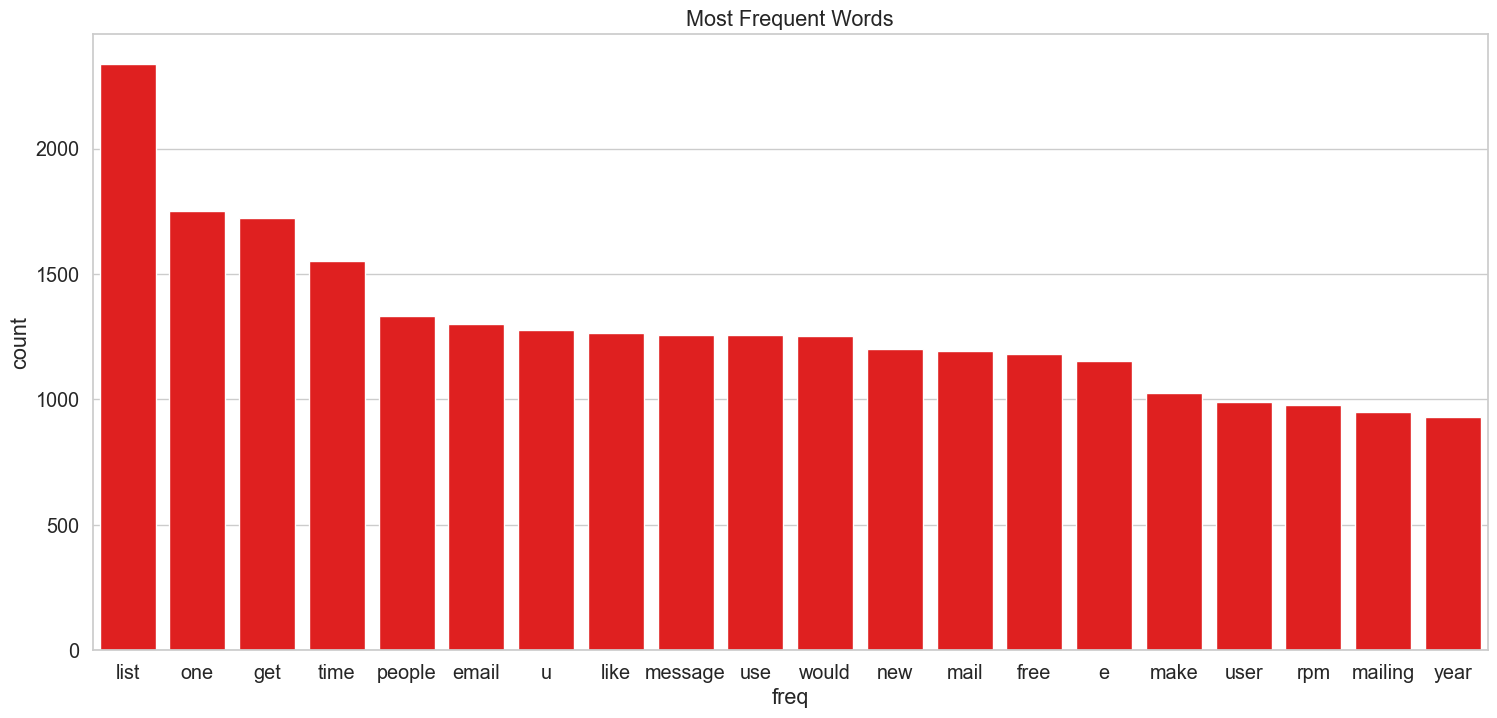

In [110]:
# Top 20 Most Frequent Words
sns.set_context(context = 'notebook', font_scale = 1.3)
sns.set_style('whitegrid')

plt.figure(figsize=(18,8))

sns.barplot(
    data = count_word(df['email_prep_lemma']).head(20),
    x = 'freq',
    y = 'count',
    color='r'
)

plt.title('Most Frequent Words')

- The most frequently occurring words in this corpus/dataset are 'number', 'url', 'list', 'one', and so on.
- Frequently occurring words that are deemed non-informative can be removed or included in the stopwords list during the preprocessing stage.

**Word cloud**

In [111]:
#  !pip install wordcloud

In [112]:
from wordcloud import WordCloud

In [113]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)
    plt.axis('off')

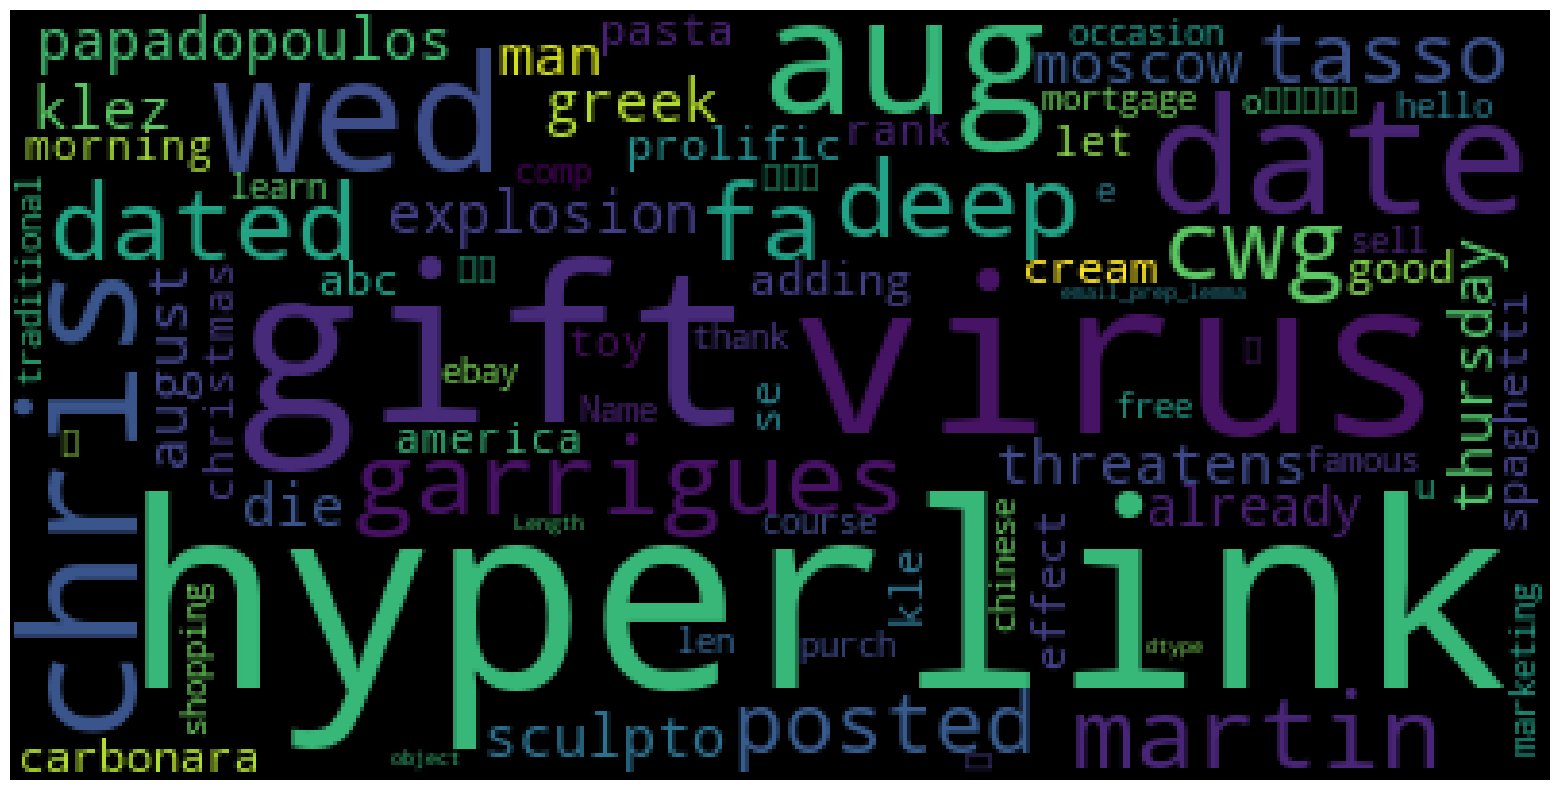

In [114]:
word_cloud = WordCloud().generate(str(df['email_prep_lemma']))
plot_cloud(word_cloud)

In [115]:
df_count =  count_word(df['email_prep_lemma'])
df_count.head()

,freq,count
0,list,2339
1,one,1750
2,get,1725
3,time,1553
4,people,1331


In [116]:
df_count[df_count['freq']=='hyperlink']

,freq,count
30,hyperlink,790


**Word cloud of spam**

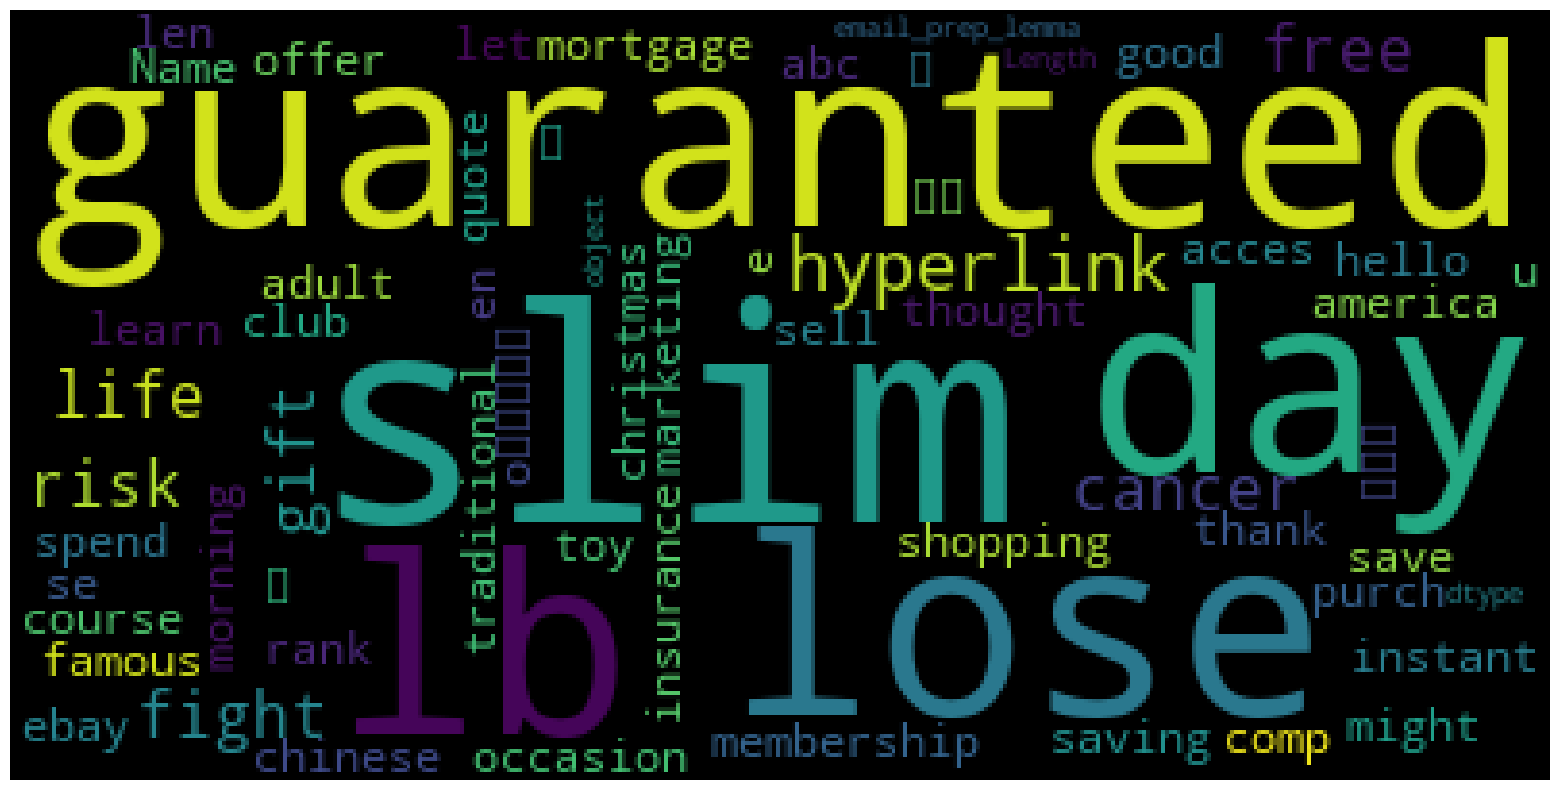

In [117]:
word_cloud_spam = WordCloud().generate(str(df[df['label'] == 1]['email_prep_lemma']))
plot_cloud(word_cloud_spam)

**Word cloud of not-spam**

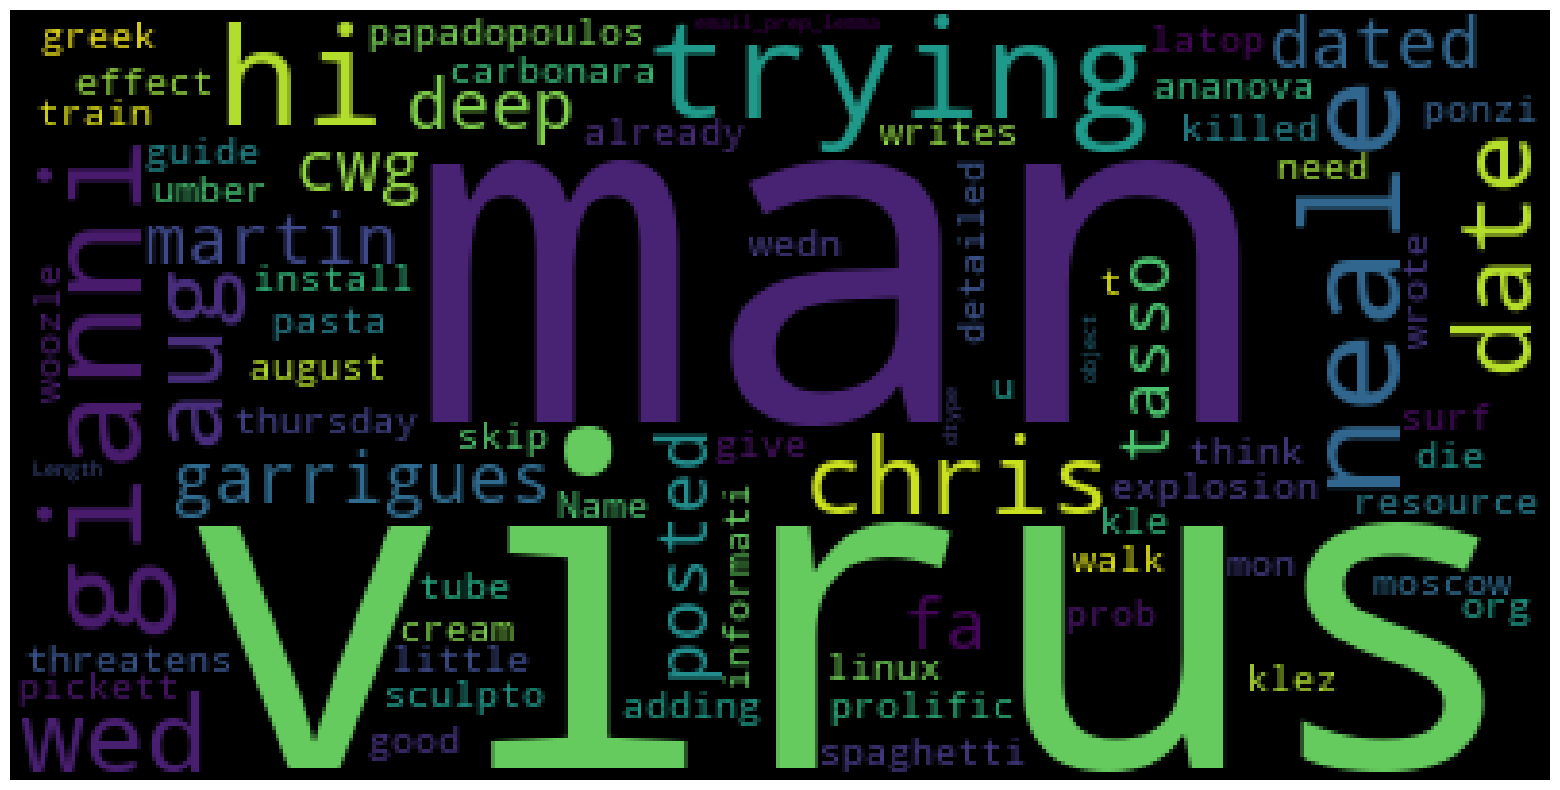

In [118]:
word_cloud_ham = WordCloud().generate(str(df[df['label'] == 0]['email_prep_lemma']))
plot_cloud(word_cloud_ham)

In spam emails, the frequent occurrences are:
- slim
- hyperlink
- cancer
- risk

In non-spam emails, the frequent occurrences are:
- man
- virus
- trying
- hi

### **Length of sentences**

In [119]:
df['length'] = df['email'].apply(len)

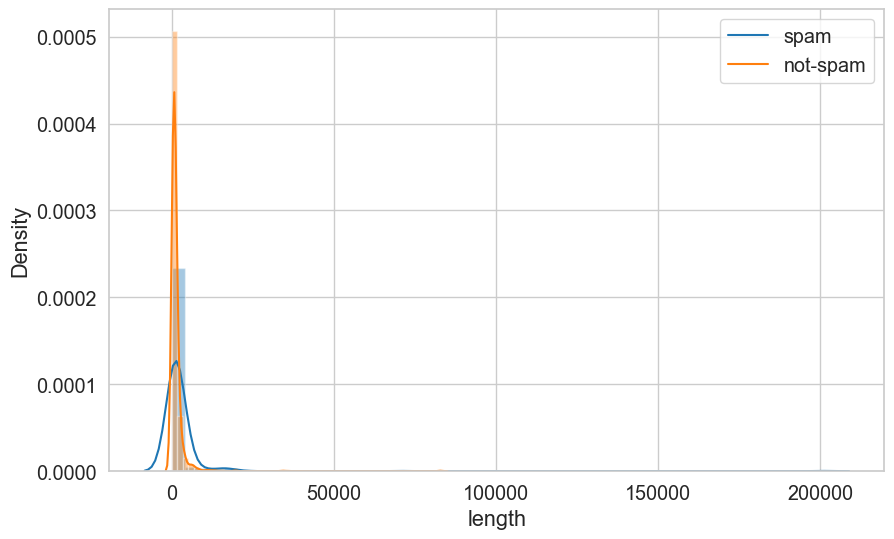

In [120]:
plt.figure(figsize = (10, 6))

df_spam = df[df['label'] == 1]
df_ham = df[df['label'] == 0]

sns.distplot(df_spam['length'])
sns.distplot(df_ham['length'])

plt.legend(['spam', 'not-spam']);

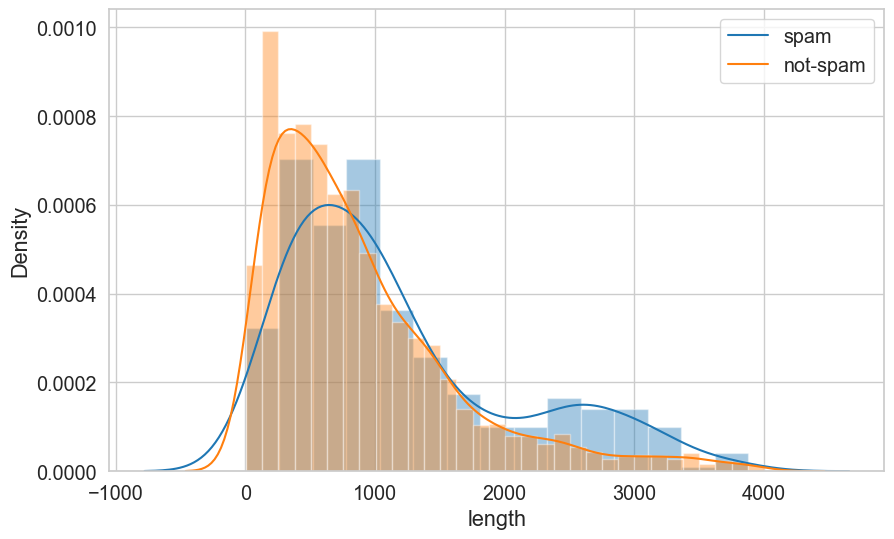

In [121]:
plt.figure(figsize = (10, 6))

df_email = df[df['length'] < 4000]
df_spam = df_email[df_email['label'] == 1]
df_ham = df_email[df_email['label'] == 0]

sns.distplot(df_spam['length'])
sns.distplot(df_ham['length'])

plt.legend(['spam', 'not-spam']);

### **Histogram Interpretation**

- The overall lengths of spam and non-spam emails are generally similar.
- Around the length of 2300-3300 words, spam emails are more prevalent than non-spam emails.

---
# **Chapter 4: Model Development**


## **DTM IDF**

In [122]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


### **Data splitting**

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = df['email_prep_lemma']
y = df['label']

In [125]:
# train test split
text_train, text_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [126]:
y.value_counts()

label
0    2500
1     500
Name: count, dtype: int64

**Vectorizer**

- The number of columns is equal to the total number of unique words in the dataset.
- Each word in one row (one email) will be assigned a weight based on how many times it appears in that specific email and how frequently it appears in other emails.

In [127]:
# Document Term Matrix dengan TF-IDF
vect = TfidfVectorizer().fit(text_train)

X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [128]:
# nama kolom
vect.get_feature_names_out()

array(['aa', 'aaa', 'aaaaaa', ..., '훨씬', '힘입어', 'ｉt的技'], dtype=object)

In [129]:
X_train

<2400x34971 sparse matrix of type '<class 'numpy.float64'>'
	with 208626 stored elements in Compressed Sparse Row format>

In [130]:
X_test

<600x34971 sparse matrix of type '<class 'numpy.float64'>'
	with 44313 stored elements in Compressed Sparse Row format>

## **Text classification**

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report, accuracy_score

#### **Choose benchmark model**

In [132]:
# Define models
# logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)


models = [knn, tree, rf, gb, xgb]
score = []
nilai_mean = []
nilai_std = []

vect = TfidfVectorizer(norm=None)

for i in models:
    skfold = StratifiedKFold(n_splits=5)

    model_pipe = Pipeline([
        ('prep', vect),
        ('resampler', SMOTE()),
        ('model', i)
    ])

    model_cv = cross_val_score(model_pipe, text_train, y_train, cv=skfold, scoring='f1', error_score='raise')
    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())
    print(model_cv, i)

[0.39702233 0.42934783 0.41343669 0.3902439  0.40932642] KNeighborsClassifier()
[0.82080925 0.90123457 0.85555556 0.87356322 0.88372093] DecisionTreeClassifier(random_state=0)
[0.95597484 0.97435897 0.93589744 0.96774194 0.96202532] RandomForestClassifier(random_state=0)
[0.9202454  0.94871795 0.92207792 0.90123457 0.91925466] GradientBoostingClassifier(random_state=0)
[0.95541401 0.96153846 0.92307692 0.95483871 0.9375    ] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_c

In [133]:
pd.DataFrame({
    'model':models,
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,KNeighborsClassifier(),0.407875,0.013585
1,DecisionTreeClassifier(random_state=0),0.866977,0.027420
2,RandomForestClassifier(random_state=0),0.959200,0.013147
3,GradientBoostingClassifier(random_state=0),0.922306,0.015200
4,"XGBClassifier(base_score=None, booster=None, c...",0.946474,0.014176


- Berdasarkan cross validation, model terbaik adalah Random Forest (f1-score 0.95)

> Indented block


- Kita akan coba melakukan hyperparameter tuning terhadap Random Forest

## **Hyperparameter tuning**


#### **Random Forest**

In [134]:
# hyperparam space Random forest

n_estimators = list(np.arange(100, 1000, 1)) # Number of trees in random forest
max_features = list(np.arange(2, 200, 1)) # Number of features to consider at every split
max_depth = list(np.arange(20, 101, 1)) # Maximum number of levels in tree
min_samples_split = list(np.arange(2, 21, 1)) # Minimum number of samples required to split a node
min_samples_leaf = list(np.arange(1, 21, 1)) # Minimum number of samples required at each leaf node
vectorizers = [CountVectorizer() , TfidfVectorizer()]
resamplers = [SMOTE(), RandomOverSampler(), None]

hyperparam_space_rf = {
    'prep': vectorizers,
    'resampler': resamplers,
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split
    # 'model__min_samples_leaf': min_samples_leaf,
}

# skfold
skfold = StratifiedKFold(n_splits=5)

# Define model
model = RandomForestClassifier(random_state=0)

# Pipeline
pipe = Pipeline([
    ('prep', TfidfVectorizer()),
    ('resampler', SMOTE()),
    ('model', model)
])

# Tuning
random_search_RF = RandomizedSearchCV(
    pipe,
    param_distributions = hyperparam_space_rf,
    cv = skfold,
    scoring= 'f1',
    n_jobs= -1,
    random_state=0,
    n_iter=100
)

In [135]:
random_search_RF.fit(text_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep', TfidfVectorizer()),
                                             ('resampler', SMOTE()),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__max_depth': [20, 21, 22, 23, 24,
                                                             25, 26, 27, 28, 29,
                                                             30, 31, 32, 33, 34,
                                                             35, 36, 37, 38, 39,
                                                             40, 41, 42, 43, 44,
                                                             45, 46...
                                                                28, 29, 30, 31, ...],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'prep': [CountVectorizer(),
                                                 TfidfVectorizer()],
                                        'resampler': [SMOTE(),
                                                      RandomOverSampler(),
                                                      None]},
                   random_state=0, scoring='f1')

In [136]:
print('Best score RF:', random_search_RF.best_score_)
print('Best params RF:', random_search_RF.best_params_)

Best score RF: 0.9638700071245788
Best params RF: {'resampler': RandomOverSampler(), 'prep': TfidfVectorizer(), 'model__n_estimators': 854, 'model__min_samples_split': 7, 'model__max_features': 191, 'model__max_depth': 97}


In [137]:
pd.DataFrame(random_search_RF.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_prep,param_model__n_estimators,param_model__min_samples_split,param_model__max_features,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
97,48.823369,2.579378,0.752342,0.221455,RandomOverSampler(),TfidfVectorizer(),854,7,191,97,"{'resampler': RandomOverSampler(), 'prep': Tfi...",0.967742,0.961039,0.980892,0.954839,0.954839,0.963870,0.009756,1
43,7.750302,0.352259,0.222790,0.023014,RandomOverSampler(),CountVectorizer(),183,14,186,75,"{'resampler': RandomOverSampler(), 'prep': Cou...",0.954248,0.967742,0.987500,0.961039,0.941935,0.962493,0.015137,2
45,27.858750,3.159685,0.496768,0.077270,RandomOverSampler(),CountVectorizer(),719,16,195,77,"{'resampler': RandomOverSampler(), 'prep': Cou...",0.947368,0.967742,0.974684,0.961039,0.955414,0.961249,0.009481,3
86,15.452555,0.720898,0.385018,0.050261,RandomOverSampler(),CountVectorizer(),451,20,135,71,"{'resampler': RandomOverSampler(), 'prep': Cou...",0.933333,0.967742,0.974359,0.961039,0.948718,0.957038,0.014572,4
74,28.563922,2.144198,0.574881,0.077526,RandomOverSampler(),TfidfVectorizer(),968,18,144,88,"{'resampler': RandomOverSampler(), 'prep': Tfi...",0.940397,0.954248,0.993711,0.948052,0.948052,0.956892,0.018926,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,3.172739,0.084983,0.289435,0.068881,None,TfidfVectorizer(),347,4,17,56,"{'resampler': None, 'prep': TfidfVectorizer(),...",0.476190,0.584071,0.632479,0.571429,0.431373,0.539108,0.073959,96
22,7.121205,0.107510,0.471191,0.022856,None,TfidfVectorizer(),993,8,56,24,"{'resampler': None, 'prep': TfidfVectorizer(),...",0.476190,0.532110,0.596491,0.571429,0.490566,0.533357,0.045904,97
92,12.120631,1.565972,0.775210,0.050562,None,TfidfVectorizer(),980,4,12,53,"{'resampler': None, 'prep': TfidfVectorizer(),...",0.241758,0.400000,0.400000,0.400000,0.297872,0.347926,0.066200,98
58,5.122295,0.170331,0.544917,0.052903,None,CountVectorizer(),780,10,3,96,"{'resampler': None, 'prep': CountVectorizer(),...",0.181818,0.241758,0.202247,0.241758,0.160920,0.205700,0.032212,99


## **Model performance on test set**

**Before Hyperparameter Tuning**

In [138]:
model_rf = RandomForestClassifier(random_state=0)

pipe = Pipeline([
    ('prep', TfidfVectorizer(norm=None)),
    ('resampler', SMOTE()),
    ('model', model_rf)
])

pipe.fit(text_train, y_train)

y_pred = pipe.predict(text_test)

f1_model = f1_score(y_test, y_pred)
f1_model

0.9441624365482234

**After Hyperparameter Tuning Random Forest**

In [139]:
random_search_RF.best_estimator_

Pipeline(steps=[('prep', TfidfVectorizer()), ('resampler', RandomOverSampler()),
                ('model',
                 RandomForestClassifier(max_depth=97, max_features=191,
                                        min_samples_split=7, n_estimators=854,
                                        random_state=0))])

In [140]:
# model dengan hyperparameter tuning
model_tuning_RF = random_search_RF.best_estimator_

# fitting
model_tuning_RF.fit(text_train, y_train)

# predict
y_pred_model_tuning_RF = model_tuning_RF.predict(text_test)

# f1 score
f1_model_tuning_RF = f1_score(y_test, y_pred_model_tuning_RF)
f1_model_tuning_RF

0.9479166666666666

### **Test Score Comparison**

In [141]:
# before tuning
print('F1 score before: ', f1_model)

# after tuning
print('F1 score after:  ', f1_model_tuning_RF)

F1 score before:  0.9441624365482234
F1 score after:   0.9479166666666666


In [142]:
print('Before tuning\n', classification_report(y_test, y_pred))
print('After tuning\n', classification_report(y_test, y_pred_model_tuning_RF))

Before tuning
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.96      0.93      0.94       100

    accuracy                           0.98       600
   macro avg       0.97      0.96      0.97       600
weighted avg       0.98      0.98      0.98       600

After tuning
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       0.99      0.91      0.95       100

    accuracy                           0.98       600
   macro avg       0.99      0.95      0.97       600
weighted avg       0.98      0.98      0.98       600



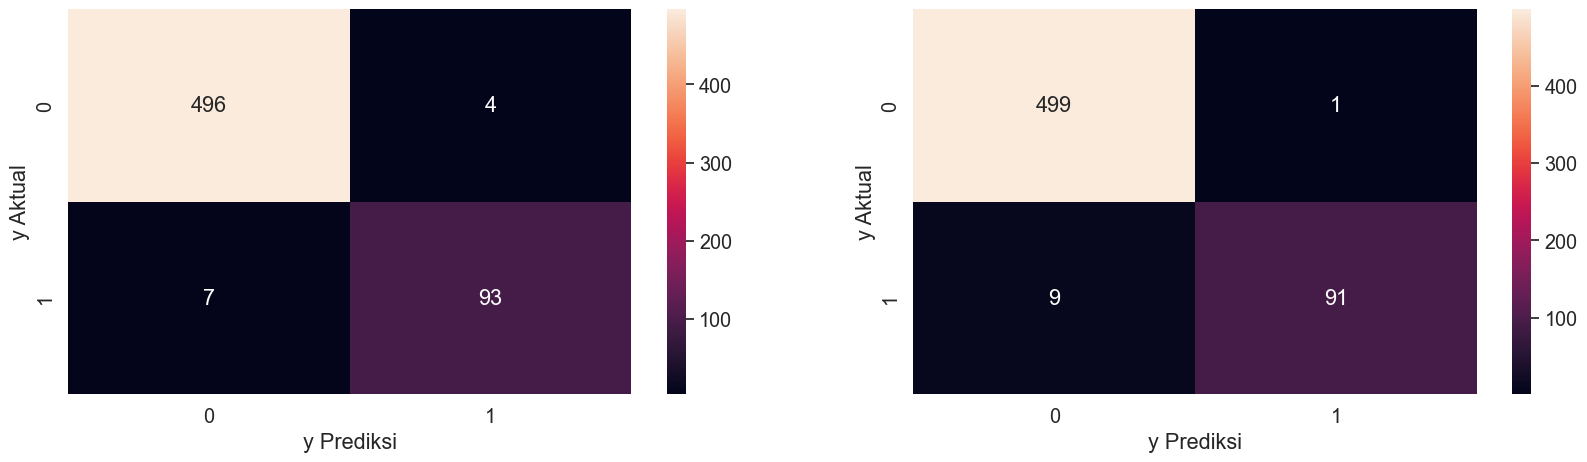

In [143]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_model_tuning_RF), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

## **Chapter 6: Conclusion**
- In this email spam classification modeling, we used Random Forest.
- In the case of email spam classification, Precision metric can be used since we focus on minimizing False Positives (non-spam emails predicted as spam).
- If using Precision, the benchmark model already has a Precision of 1.0 and even after hyperparameter tuning, the Precision value remains at 1.0, meaning the predictions are perfect.
- Hyperparameter tuning successfully improved the model's performance in predicting whether an email is spam or not, as seen from the F1 score, which initially was 0.935 and increased to 0.947 after hyperparameter tuning.
- Improvement is observed in Precision: initially, there were 7 False Positives, which reduced to 1 False Positive after hyperparameter tuning.
- However, Recall decreased: initially, there were 6 False Negatives, which increased to 9 False Negatives after hyperparameter tuning.
- But again, since False Positives are more dangerous, it means our model has improved performance after hyperparameter tuning.